In [12]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

C:\Users\adity\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
X = iris.data[:, 2:4]
X = pd.DataFrame(X)

In [16]:
X.columns = ['petal_length', 'petal_width']

In [17]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [18]:
from matplotlib import pyplot as plt

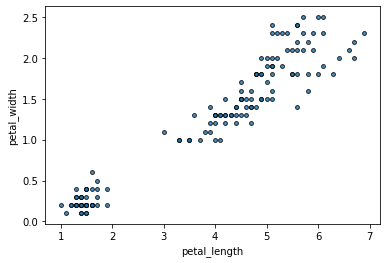

In [25]:
plt.scatter(X.petal_length, X.petal_width, s=15, edgecolors='k', alpha=0.8)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=3)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
pred = kmeans.predict(X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
X['pred'] = pred 
X.head()

,petal_length,petal_width,pred
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


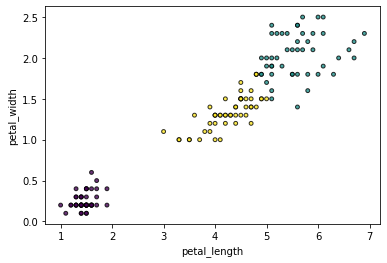

In [32]:
plt.scatter(X.petal_length, X.petal_width, s=15, c=X.pred, edgecolors='k', alpha=0.8)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

# Elbow Method for optimum K

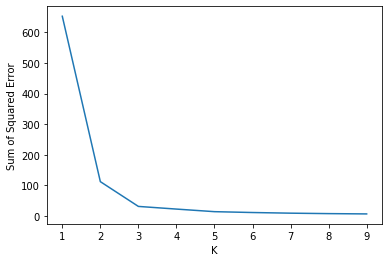

In [36]:
K_values = list(range(1,10))
sse = []
for K in K_values:
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(K_values, sse)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.show()

# K= 2

In [37]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
y_clf_pred = clf.predict(X)
y_clf_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
X['pred_new'] = y_clf_pred 
X.head()

,petal_length,petal_width,pred,pred_new
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1


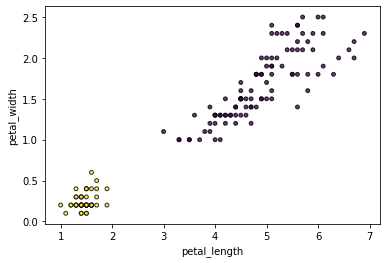

In [40]:
plt.scatter(X.petal_length, X.petal_width, s=15, c=X.pred_new, edgecolors='k', alpha=0.8)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

# Preprocessing using min max scaler

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

scaler.fit(X[['petal_length']])
X['petal_length'] = scaler.transform(X[['petal_length']])

scaler.fit(X[['petal_width']])
X['petal_width'] = scaler.transform(X[['petal_width']])

In [44]:
X.head()

,petal_length,petal_width,pred,pred_new
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1


In [46]:
X.drop(columns=['pred', 'pred_new'], inplace=True)

In [47]:
X.head()

,petal_length,petal_width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [48]:
kmeansclf = KMeans(n_clusters=3)

In [49]:
pred = kmeansclf.fit_predict(X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
len(pred)

150

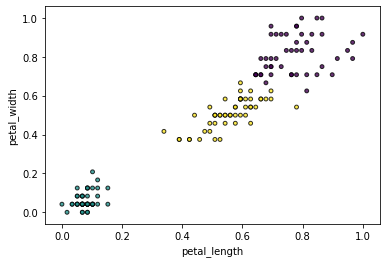

In [51]:
plt.scatter(X.petal_length, X.petal_width, s=15, c=pred, edgecolors='k', alpha=0.8)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

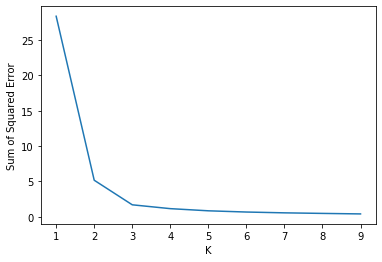

In [52]:
K_values_new = list(range(1,10))
sse_new = []
for K_new in K_values_new:
    kmeans_new = KMeans(n_clusters=K_new)
    kmeans_new.fit(X)
    sse_new.append(kmeans_new.inertia_)
plt.plot(K_values_new, sse_new)
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.show()

# K=3